# Machine Exercise 5



## Part 1: Country Data from HELP International 

### 1.I. Load Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jhon\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2


In [2]:
from pathlib import Path
import pandas as pd
import zipfile

# Define the path variable
p = Path(path)

if p.is_dir():
    csvs = sorted(p.glob("**/*.csv"))
    if csvs:  # Check if any CSV files exist
        df = pd.read_csv(csvs[0])
    else:
        raise FileNotFoundError("No CSV files found in directory")
elif p.suffix == ".zip":
    with zipfile.ZipFile(p) as z:
        csv_names = [n for n in z.namelist() if n.lower().endswith(".csv")]
        if csv_names:  # Check if ZIP contains CSV files
            with z.open(csv_names[0]) as f:
                df = pd.read_csv(f)
        else:
            raise FileNotFoundError("No CSV files found in ZIP archive")
else:
    # Handle direct CSV file path
    if p.suffix == ".csv":
        df = pd.read_csv(p)
    else:
        raise ValueError(f"Unsupported file type: {p.suffix}")

In [4]:


# Prompt: Store the dataframe in a variable named X
X = df
Y = df['country']
# Prompt: Drop the column named 'Country' from X
X = X.drop(columns=['country'])

### 1.II. K-Means

<mark style="background-color: #fff000">Normalize the features data using Standard Scaler. Then, perform K-means clustering 
on all features. Display the elbow plot (Inertia vs. no. of clusters) and the silhouette score plot. 
What number of clusters is recommended?</mark>

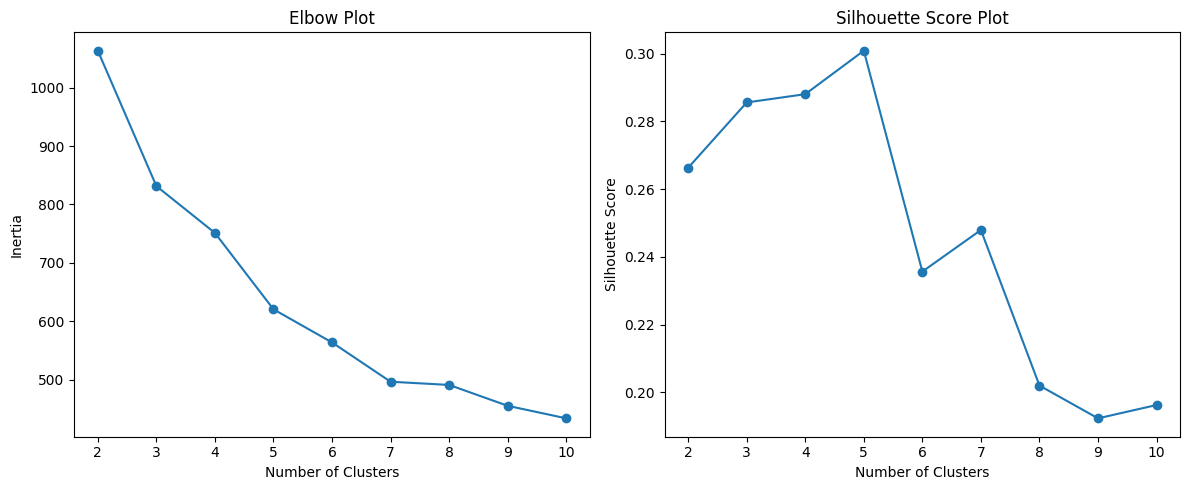

Recommended number of clusters: 5


In [5]:
# Prompt: Normalize the features of X using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import matplotlib.pyplot as plt

# Define the range for the number of clusters
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

# Perform KMeans clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    
def plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores):
    # Plot the elbow plot (Inertia vs. number of clusters)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    # Plot the silhouette score plot
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# Call the function
plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores)

# Recommended number of clusters based on the elbow and silhouette score
recommended_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Recommended number of clusters: {recommended_clusters}")


The Elbow Plot and Silhouette Score are two commonly used methods to determine the optimal number of clusters in KMeans clustering.

Elbow Plot:
The Elbow Plot shows the relationship between the number of clusters and the inertia (sum of squared distances of samples to their closest cluster center).
As the number of clusters increases, the inertia decreases because the data points are closer to their respective cluster centers.
The "elbow point" is the point where the rate of decrease in inertia slows down significantly, indicating the optimal number of clusters.
This point represents a balance between minimizing inertia and avoiding overfitting with too many clusters.

Silhouette Score:
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.
It ranges from -1 to 1, where a higher score indicates better-defined clusters.
A high Silhouette Score suggests that the data points are well-clustered and distinct from other clusters.
By plotting the Silhouette Score for different numbers of clusters, the optimal number of clusters can be identified as the one with the highest score.

In this notebook, the Elbow Plot and Silhouette Score Plot were used together to recommend the optimal number of clusters as 5.

###  1.III. Hierarchical clustering

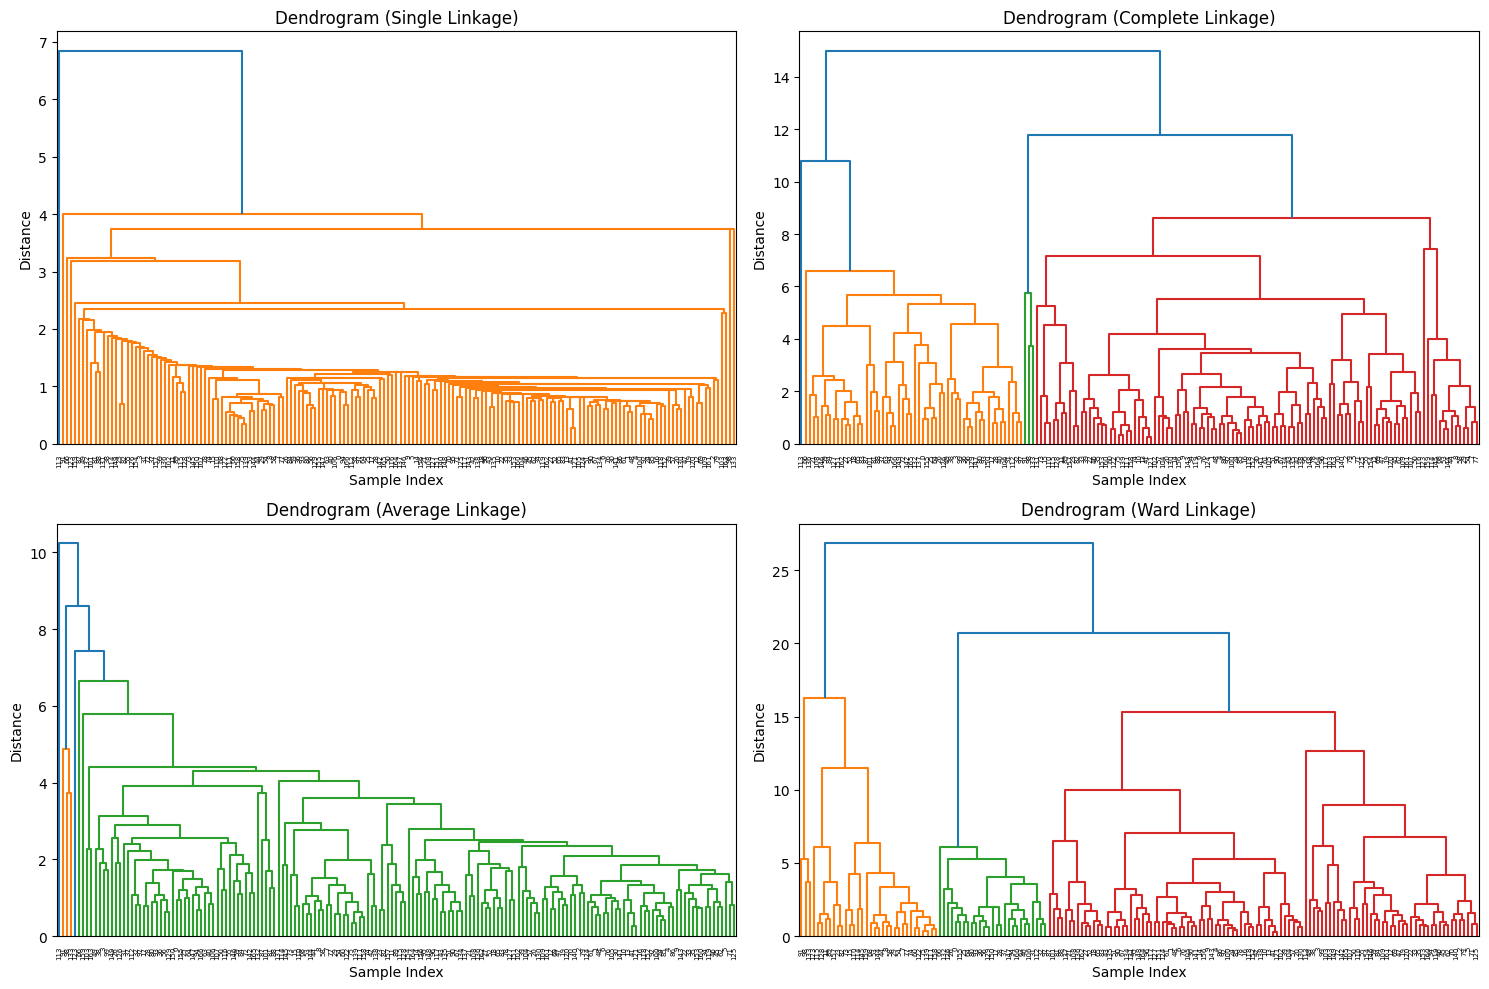

Cluster labels for Single linkage: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster labels for Complete linkage: [1 4 4 1 4 4 4 5 5 4 4 4 4 4 4 4 4 1 1 4 4 1 4 4 4 1 1 1 1 5 4 1 1 4 4 4 1
 1 1 4 1 4 4 4 5 4 4 4 4 1 4 4 1 5 5 4 1 4 5 1 4 4 4 1 1 1 1 4 5 4 4 4 1 4
 4 4 4 5 4 4 1 1 4 1 1 4 4 1 1 4 4 3 4 1 1 4 4 1 3 1 4 1 4 4 4 4 1 4 1 4 4
 4 1 2 5 4 4 4 4 4 4 4 4 5 4 4 1 1 4 1 4 4 1 3 4 4 1 1 4 4 4 4 1 4 5 5 1 1
 4 1 1 1 4 4 4 1 4 4 4 5 4 4 1 4 4 1 1]
Cluster labels for Average linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Import necessary libraries for hierarchical clustering

# Perform hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
linkage_results = {method: linkage(X_scaled, method=method) for method in linkage_methods}

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
        plt.subplot(2, 2, i)
        dendrogram(linkage_results[method])
        plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Compare the clustering results for each linkage method
cluster_labels = {method: fcluster(linkage_results[method], t=5, criterion='maxclust') for method in linkage_methods}
for method, labels in cluster_labels.items():
        print(f"Cluster labels for {method.capitalize()} linkage: {labels}")

### 1.IV. PCA (2 features) + K-means

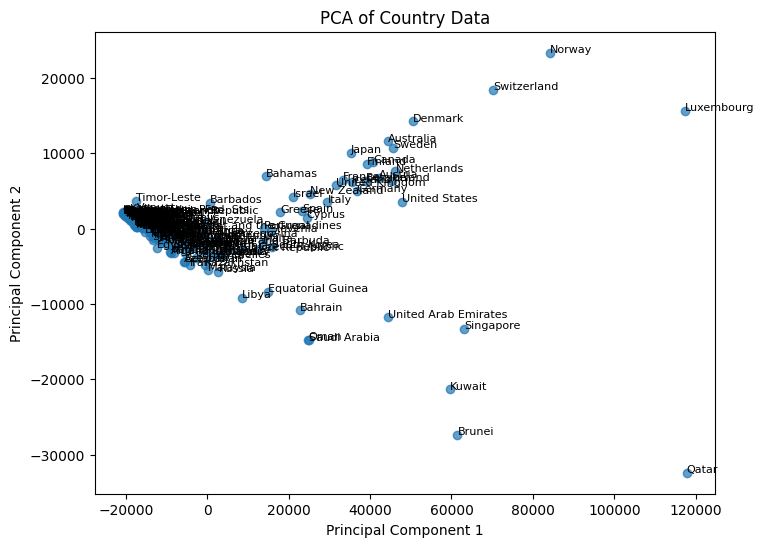

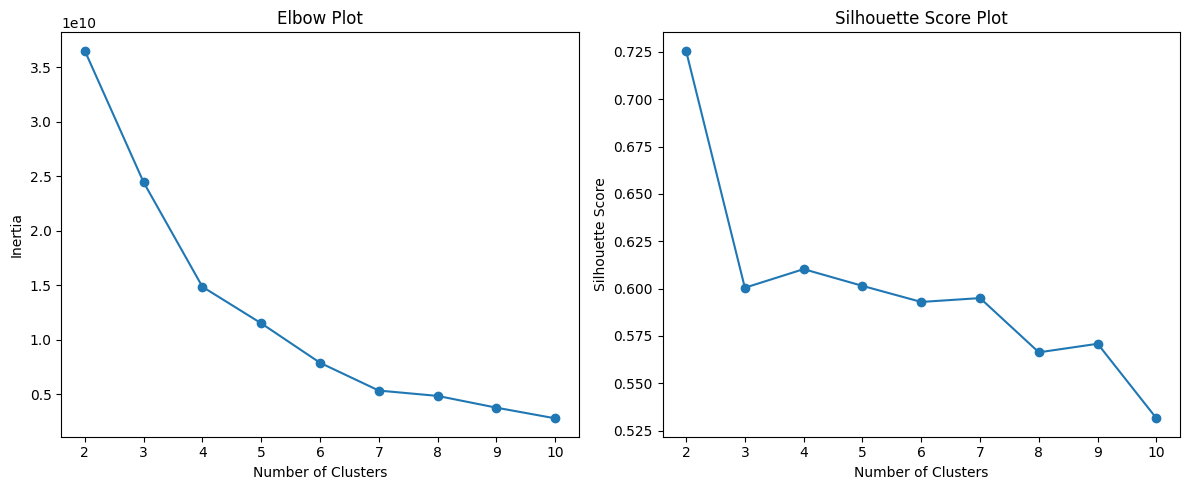

In [6]:
# Prompt: Perform PCA on X to reduce its dimensions to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Prompt: Display a scatter plot of the PCA-reduced data with some points labeled
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for i, country in enumerate(df['country']):
   
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=8)
plt.title('PCA of Country Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Repeat KMeans clustering on PCA-reduced data
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

# Perform KMeans clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores)
    


### 1.V. 2D PCA  + Anomaly Detetion

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

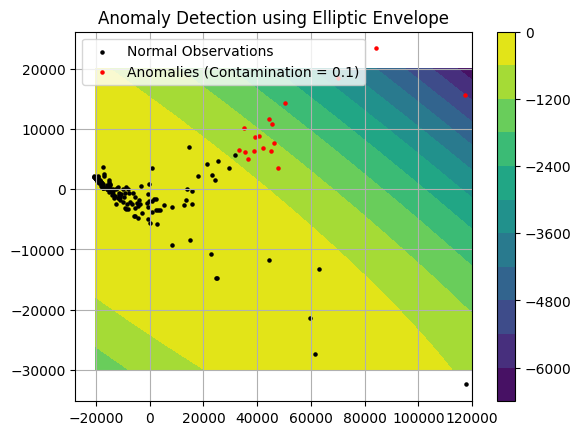

In [29]:
Xp, Yp = np.meshgrid(np.linspace(-20000,120000),np.linspace(-30000,20000))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

envelope = EllipticEnvelope(random_state=0, contamination=0.1).fit(X_pca)
Zp = envelope.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = envelope.predict(X_pca)
normals = X_pca[y_pred == 1,:]
anomals = X_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (Contamination = 0.1)')
plt.title('Anomaly Detection using Elliptic Envelope')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

Threshold (KDE) = 0.012569474629724105


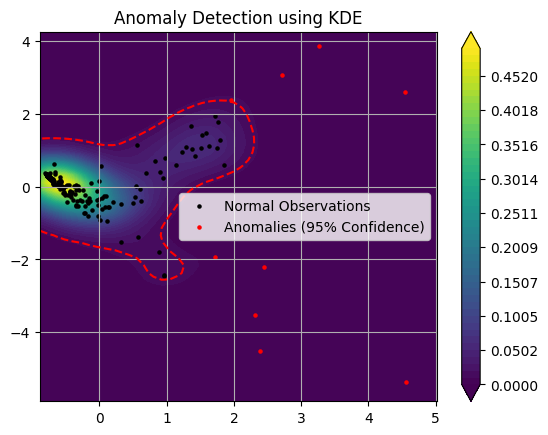

(158, 2)
(9, 2)


In [59]:
# Generate the KDE surface as Z
X_pca_scaled  = scaler.fit_transform(X_pca)
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_pca_scaled)


Xp, Yp = np.meshgrid(
    np.linspace(X_pca_scaled[:, 0].min() * 1.1, X_pca_scaled[:, 0].max() * 1.1, 50),
    np.linspace(X_pca_scaled[:, 1].min() * 1.1, X_pca_scaled[:, 1].max() * 1.1, 50)
)
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X_pca_scaled)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X_pca_scaled[scores > threshold,:]
anomals = X_pca_scaled[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=np.linspace(Zp.min(), Zp.max(), 50), cmap='viridis', extend='both')
plt.contour(Xp, Yp, Zp, levels=[np.exp(threshold)], colors='red', linestyles='dashed', linewidths=1.5)
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

print(normals.shape)
print(anomals.shape)

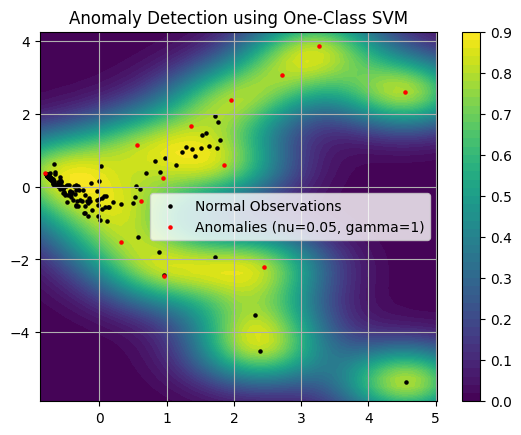

In [60]:
ocsvm = OneClassSVM(nu=0.05, gamma=1).fit(X_pca_scaled)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (nu=0.05, gamma=1)')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

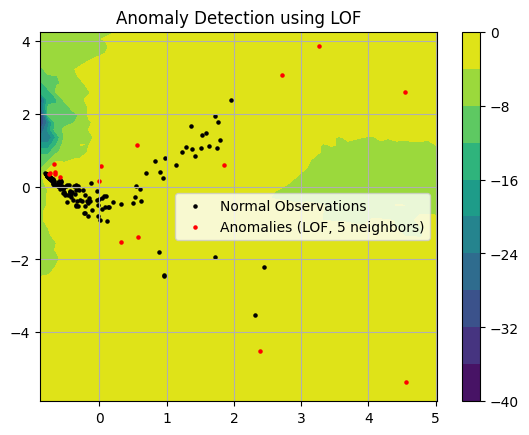

In [64]:
lof = LocalOutlierFactor(n_neighbors=5,novelty=True).fit(X_pca_scaled)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (LOF, 5 neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

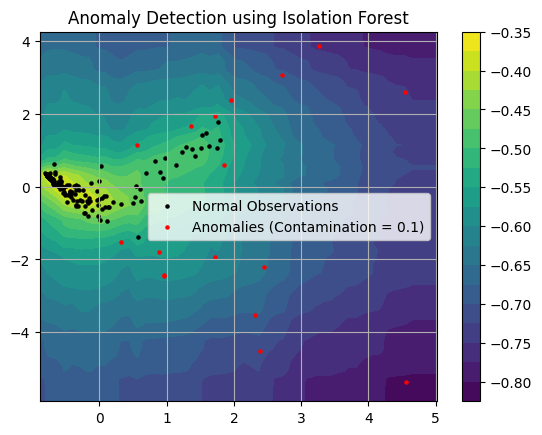

In [65]:
isoforest = IsolationForest(contamination=0.1).fit(X_pca_scaled)
Zp = isoforest.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = isoforest.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=20, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (Contamination = 0.1)')
plt.title('Anomaly Detection using Isolation Forest')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

In [56]:
# Get the indices of anomalies in the original dataset
anomalous_indices = np.where(scores <= threshold)[0]

# Get the list of anomalous countries
anomalous_countries = df.iloc[anomalous_indices]['country']

# Identify the feature that could be the reason for the anomaly
anomalous_features_max = df.iloc[anomalous_indices].drop(columns=['country']).idxmax(axis=1)
anomalous_features_min = df.iloc[anomalous_indices].drop(columns=['country']).idxmin(axis=1)

data = {
    'Country': anomalous_countries,
    'Anomalous Feature Max': anomalous_features_max,
    'Anomalous Feature Min': anomalous_features_min
}



from IPython.display import Image, display
display(pd.DataFrame(data))
display(df.iloc[anomalous_indices])

df # sort df by total_fer
df_copy = df.copy()
df_copy = df_copy.sort_values(by='income', ascending=False)

print(df_copy[['country', 'income']].head(10))

,Country,Anomalous Feature Max,Anomalous Feature Min
23,Brunei,income,total_fer
44,Denmark,gdpp,total_fer
82,Kuwait,income,total_fer
91,Luxembourg,gdpp,total_fer
114,Norway,gdpp,total_fer
123,Qatar,income,health
133,Singapore,income,inflation
145,Switzerland,gdpp,inflation
157,United Arab Emirates,income,total_fer


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000


                  country  income
123                 Qatar  125000
91             Luxembourg   91700
23                 Brunei   80600
82                 Kuwait   75200
133             Singapore   72100
114                Norway   62300
157  United Arab Emirates   57600
145           Switzerland   55500
159         United States   49400
73                Ireland   45700


## 2. Early-Stage Diabetes Risk Prediction

### 2.I. Load Dataset

In [66]:
# code source: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529) 
  
# data (as pandas dataframes) 
X = early_stage_diabetes_risk_prediction.data.features 
y = early_stage_diabetes_risk_prediction.data.targets 
  
# metadata 
print(early_stage_diabetes_risk_prediction.metadata) 
  
# variable information 
print(early_stage_diabetes_risk_prediction.variables) 


{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

### 2.II. Encoding, and Dataset Split

In [75]:
# Encode categorical variables
from sklearn.calibration import LabelEncoder


X = pd.get_dummies(X, drop_first=True)
# Encode y

le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets (stratify = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



### 2.III. Best Model Using 

I'm split wether to find the best model using a single objective function, or each classifier has their own optuna objective function. General Optutn Function 

In [91]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", 
                                                 ["MLP", "RandomForest", "XGBoost", "LogisticRegression", "NaiveBayes", "SVM", "kNN"])
    
    if classifier_name == "MLP":
        hidden_layer_sizes_choices = ["(50,)", "(100,)", "(50, 50)"]
        params = {
            "hidden_layer_sizes": eval(trial.suggest_categorical("hidden_layer_sizes", hidden_layer_sizes_choices)),
            "activation": trial.suggest_categorical("activation", ["relu", "tanh"]),
            "solver": trial.suggest_categorical("solver", ["adam", "sgd"]),
            "alpha": trial.suggest_float("alpha", 1e-5, 1e-1, log=True),
        }
        model = MLPClassifier(**params, max_iter=1000, random_state=42, early_stopping=True)
    
    elif classifier_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        }
        model = RandomForestClassifier(**params, random_state=42)
    
    elif classifier_name == "XGBoost":
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300, step=50),
        }
        model = XGBClassifier(**params, eval_metric="logloss", random_state=42)
    
    elif classifier_name == "LogisticRegression":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
            "solver": trial.suggest_categorical("k-solver", ["liblinear", "lbfgs"]),
        }
        model = LogisticRegression(C=params["C"], solver=params["solver"], max_iter=1000, random_state=42)
    
    elif classifier_name == "NaiveBayes":
        model = GaussianNB()
    
    elif classifier_name == "SVM":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly"]),
        }
        model = SVC(**params, random_state=42)
    
    elif classifier_name == "kNN":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 3, 15),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        }
        model = KNeighborsClassifier(**params)
    
    # Perform 10-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    return score

# Create and run the Optuna study
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Get the best model and hyperparameters
best_params = study.best_params
best_classifier = best_params.pop("classifier")

if best_classifier == "MLP":
    hidden_layer_sizes = eval(best_params["hidden_layer_sizes"])
    best_model = MLPClassifier(**best_params,  max_iter=1000, random_state=42, early_stopping=True)
elif best_classifier == "RandomForest":
    best_model = RandomForestClassifier(**best_params, random_state=42)
elif best_classifier == "XGBoost":
    best_model = XGBClassifier(**best_params, eval_metric="logloss", random_state=42)
elif best_classifier == "LogisticRegression":
    best_model = LogisticRegression(C=best_params["C"], solver=best_params["k-solver"], random_state=42)
elif best_classifier == "NaiveBayes":
    best_model = GaussianNB()
elif best_classifier == "SVM":
    best_model = SVC(**best_params, random_state=42)
elif best_classifier == "kNN":
    best_model = KNeighborsClassifier(**best_params)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Best Classifier: {best_classifier}")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print(f"Test F1-Score: {f1}")

[I 2025-12-02 05:07:31,693] A new study created in memory with name: no-name-a0e82eea-0dc3-452c-8a14-d24f9287475a


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-12-02 05:07:33,788] Trial 0 finished with value: 0.9663182346109174 and parameters: {'classifier': 'RandomForest', 'n_estimators': 300, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 0 with value: 0.9663182346109174.
[I 2025-12-02 05:07:35,198] Trial 1 finished with value: 0.9736353077816492 and parameters: {'classifier': 'RandomForest', 'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 05:07:35,242] Trial 2 finished with value: 0.6153310104529617 and parameters: {'classifier': 'SVM', 'C': 1.2173252504194043, 'kernel': 'poly'}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 05:07:35,269] Trial 3 finished with value: 0.9207317073170733 and parameters: {'classifier': 'LogisticRegression', 'C': 12.746711578215052, 'k-solver': 'liblinear'}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 05:07:36,271] Trial 4 finished with value: 0.9664924506387921 and parameters: {'clas

### 2.IV. Random Forest 

This section focuses on the following; finding a better Random Forest through hyperparameter tuning, and comparison on paper's Best Random Forest.

In [93]:

def objective_rf(trial):
    
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000, step=2),
        "max_depth": trial.suggest_int("max_depth", 3, 100),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
    }
    model = RandomForestClassifier(**params, random_state=42)
    
    # Perform 10-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    return score

# Create and run the Optuna study
study_rf = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study_rf.optimize(objective_rf, n_trials=500, show_progress_bar=True)

# Get the best model and hyperparameters
best_params_rf = study_rf.best_params


best_model = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print(f"Test F1-Score: {f1}")

[I 2025-12-02 05:14:33,172] A new study created in memory with name: no-name-697c1d6c-94b6-4053-a7ef-c7fd82251c1d


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-12-02 05:14:35,764] Trial 0 finished with value: 0.942102206736353 and parameters: {'n_estimators': 380, 'max_depth': 96, 'min_samples_split': 15}. Best is trial 0 with value: 0.942102206736353.
[I 2025-12-02 05:14:39,963] Trial 1 finished with value: 0.9783972125435539 and parameters: {'n_estimators': 602, 'max_depth': 18, 'min_samples_split': 4}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 05:14:40,446] Trial 2 finished with value: 0.9469802555168411 and parameters: {'n_estimators': 66, 'max_depth': 87, 'min_samples_split': 13}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 05:14:45,122] Trial 3 finished with value: 0.922938443670151 and parameters: {'n_estimators': 712, 'max_depth': 5, 'min_samples_split': 20}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 05:14:50,765] Trial 4 finished with value: 0.9783972125435539 and parameters: {'n_estimators': 834, 'max_depth': 23, 'min_samples_split': 5}. Best is trial 1 with value: 0.

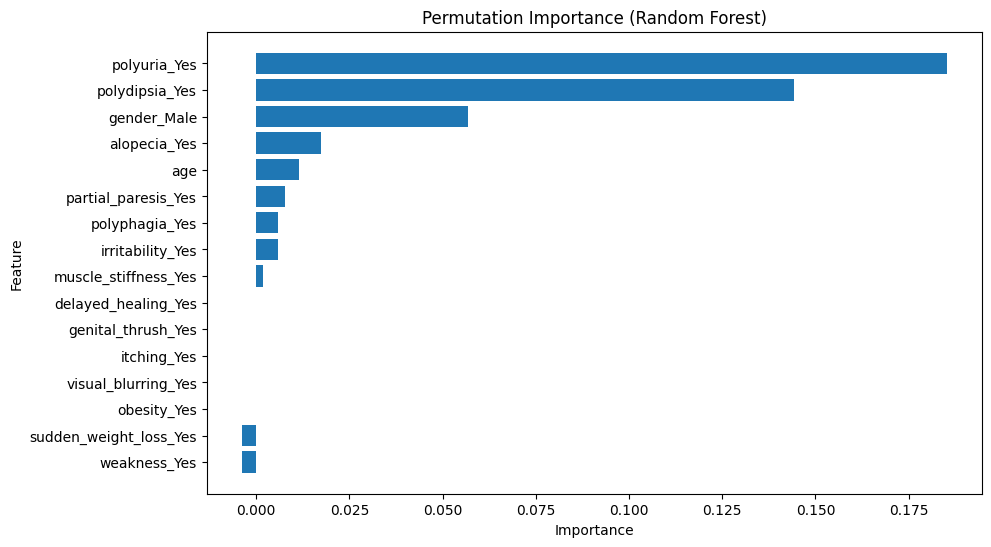

In [97]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring="f1_weighted")

# Create a DataFrame for better visualization
perm_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df["Feature"], perm_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

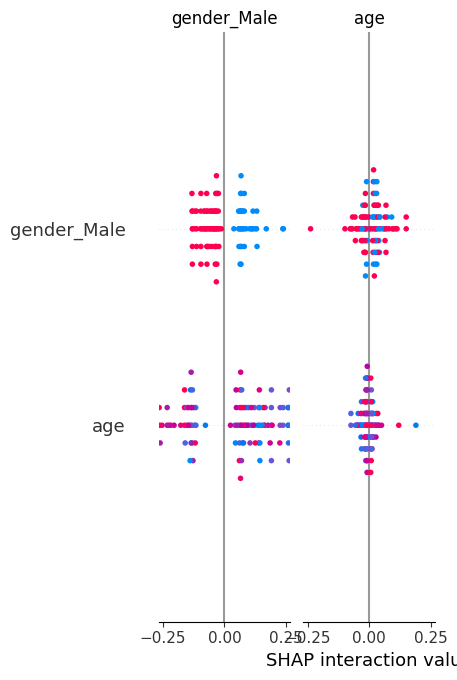

In [106]:
import shap

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed plot for individual predictions

RandomForestClassifier(max_depth=50, n_estimators=396, random_state=42)


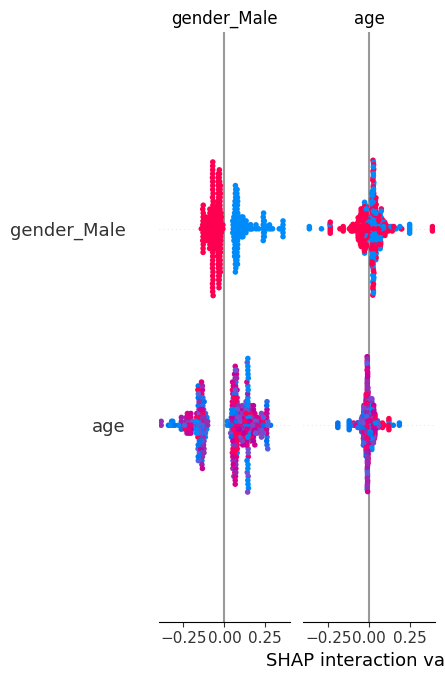

In [103]:
import shap

print(best_model)

# The next few lines help us apply SHAP values on a Pipeline model
explainer = shap.TreeExplainer(best_model)
observations = X_train
shap_values = explainer.shap_values(X_train)

# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar")


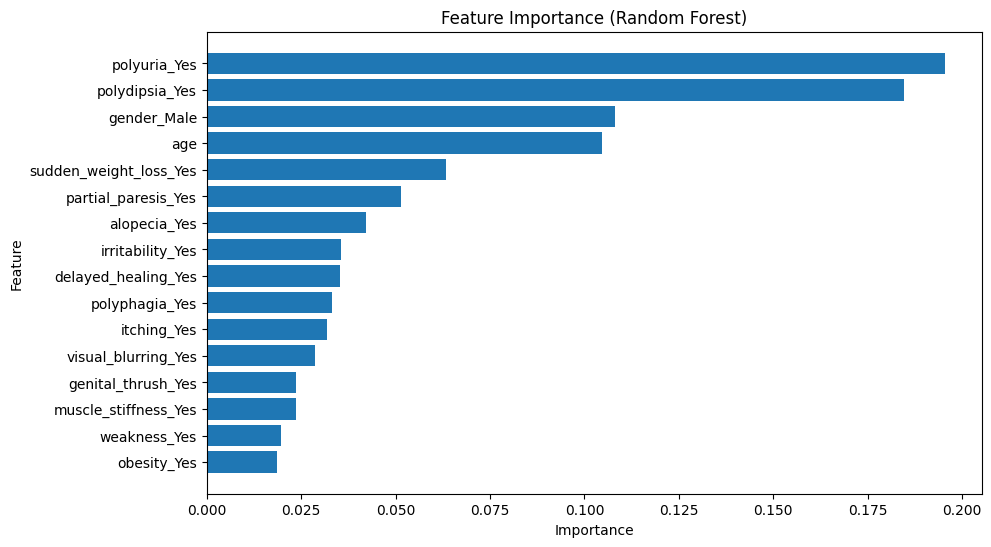

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained Random Forest model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, accuracy_score

alphas = np.logspace(-3, 3, 10)
best_alpha = None
best_val_score = -np.inf
best_model = None

X_val = X_test
y_val = y_test
for alpha in alphas:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    pipe.fit(X_train, y_train)
    val_pred = pipe.predict(X_val)
    val_score = r2_score(y_val, val_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        best_alpha = alpha
        best_model = pipe

# Final evaluation
train_score =  r2_score(y_train, best_model.predict(X_train))
test_score = r2_score(y_test, best_model.predict(X_test))

ridge = best_model.named_steps['ridge']

# Get the feature names for X1 to X8
feature_names = np.array(X.columns[:8])

# Get absolute value of coefficients for the best Ridge model
coef_abs = np.abs(ridge.coef_[:8])

# Get indices of top 5 features
top5_idx = np.argsort(coef_abs)[-5:][::-1]
top5_features = feature_names[top5_idx]

print("Top 5 features among X1 to X8:", list(top5_features))


Top 5 features among X1 to X8: ['polyuria_Yes', 'polydipsia_Yes', 'gender_Male', 'genital_thrush_Yes', 'sudden_weight_loss_Yes']
